## Exploring Hacker News Posts

In this project, we'll work with a data set of submissions to popular technology site `Hacker News`. Hacker News is a site started by the startup incubator `Y Combinator`, where user-submitted stories (known as "posts") are voted and commented upon, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of Hacker News' listings can get hundreds of thousands of visitors as a result.

**Dataset** - [Hacker News](https://www.kaggle.com/hacker-news/hacker-news-posts)

The dataset has been reduced from almost 300,000 rows to approximately 20,000 rows by removing all submissions that did not receive any comments, and then randomly sampling from the remaining submissions.

**Column Descriptions:**

- `id`: The unique identifier from Hacker News for the post
- `title`: The title of the post
- `url`: The URL that the posts links to, if it the post has a URL
- `num_points`: The number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes
- `num_comments`: The number of comments that were made on the post
- `author`: The username of the person who submitted the post
- `created_at`: The date and time at which the post was submitted

We're specifically interested in posts whose titles begin with either `Ask HN` or `Show HN`. Users submit `Ask HN` posts to ask the Hacker News community a specific question. Below are a couple examples:

- `Ask HN: How to improve my personal website?`
- `Ask HN: Am I the only one outraged by Twitter shutting down share counts?`
- `Ask HN: Aby recent changes to CSS that broke mobile?`

Likewise, users submit Show HN posts to show the Hacker News community a project, product, or just generally something interesting. Below are a couple of examples:

- `Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform'`
- `Show HN: Something pointless I made`
- `Show HN: Shanhu.io, a programming playground powered by e8vm`

**We'll compare these two types of posts to determine the following:**

- Do `Ask HN` or `Show HN` receive more comments on average?
- Do posts created at a certain time receive more comments on average?
<hr>

**Read the dataset**


Let's read the `hacker_news.csv` file in as a list of lists

In [1]:
import csv
filename = 'hacker_news.csv'
file = open(filename)
filecontents = csv.reader(file)
hn = list(filecontents)
hn_data_header, hn_data = hn[0],hn[1:]

Let's print the first 5 rows from our dataset

In [2]:
print(hn_data_header,'\n')
for row in hn_data[:5]:
    print(row)
    print()

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'] 

['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']

['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30']

['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20']

['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01']

['10301696', 'Note by Note: The Making of Steinway L1037 (2007)', 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0', '8', '2', 'walterbell', '9/30/2015 4:12']



**Extracting `Ask HN` and `Show HN` posts**

Since we're only concerned with post titles beginning with `Ask HN` or `Show HN`, we'll create new lists of lists containing just the data for those titles.

- To find the posts that begin with either `Ask HN` or `Show HN`, we'll use the string method `startswith()`
- Since `startswith()` method deals `case sensitive` strings, we will use the `lower()` method which returns a lowercase version of the starting string.

In [3]:
# List to store 'Ask HN' i.ie., Ask Hacker News Posts
ask_posts = []
# List to store 'Show HN' i.ie., Show Hacker News Posts
show_posts = []
# List to store the remaining posts (posts other than 'Ask HN' & 'Show HN')
other_posts = []

for post_info_list in hn_data:
    title = post_info_list[1].lower()
    if title.startswith('ask hn'):
        ask_posts.append(post_info_list)
    elif title.startswith('show hn'):
        show_posts.append(post_info_list)
    else:
        other_posts.append(post_info_list)
        
print('Total number of posts with title beginning with Ask HN: {}'.format(len(ask_posts)))
print('Total number of posts with title beginning with Show HN: {}'.format(len(show_posts)))
print('Total number of remaining posts: {}'.format(len(other_posts)))

Total number of posts with title beginning with Ask HN: 1744
Total number of posts with title beginning with Show HN: 1162
Total number of remaining posts: 17194


The first 3 rows in the `ask_posts` list of lists

In [4]:
for row in ask_posts[:3]:
    print(row)
    print()

['12296411', 'Ask HN: How to improve my personal website?', '', '2', '6', 'ahmedbaracat', '8/16/2016 9:55']

['10610020', 'Ask HN: Am I the only one outraged by Twitter shutting down share counts?', '', '28', '29', 'tkfx', '11/22/2015 13:43']

['11610310', 'Ask HN: Aby recent changes to CSS that broke mobile?', '', '1', '1', 'polskibus', '5/2/2016 10:14']



The first 3 rows in the `show_posts` list of lists

In [5]:
for row in show_posts[:3]:
    print(row)
    print()

['10627194', 'Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform', 'https://iot.seeed.cc', '26', '22', 'kfihihc', '11/25/2015 14:03']

['10646440', 'Show HN: Something pointless I made', 'http://dn.ht/picklecat/', '747', '102', 'dhotson', '11/29/2015 22:46']

['11590768', 'Show HN: Shanhu.io, a programming playground powered by e8vm', 'https://shanhu.io', '1', '1', 'h8liu', '4/28/2016 18:05']



The first 3 rows in the `other_posts` list of lists

In [6]:
for row in other_posts[:3]:
    print(row)
    print()

['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']

['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30']

['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20']



**Average number of comments for `Ask HN` and `Show HN` posts**

Let's determine if *ask posts* or *show posts* receive more comments on average.

**Ask SH posts**

In [7]:
total_ask_comments = 0

for ask_post_list in ask_posts:
    num_comments = int(ask_post_list[4])
    total_ask_comments += num_comments
    
# average number of 'Ask SH' comments
avg_ask_comments = total_ask_comments / len(ask_posts)
print('Average number of Ask SH comments: {}'.format(avg_ask_comments))

Average number of Ask SH comments: 14.038417431192661


**Show SH posts**

In [8]:
total_show_comments = 0

for show_post_list in show_posts:
    total_show_comments += int(show_post_list[4])
    
# average number of 'Show SH' comments
avg_show_comments = total_show_comments / len(show_posts)
print('Average number of Show SH comments: {}'.format(avg_show_comments))

Average number of Show SH comments: 10.31669535283993


From the above computation, we find that on average `Ask SH` posts receive more comments (14 approx.) compared to `Show SH` posts (10 approx.)

| Post type | Avg. comments |
| --------- | ------------- |
| Ash SH    | 14 (approx.)  |
| Show SH   | 10 (approx.)  |

Since `Ask SH` posts are more likely to receive comments, we'll focus our remaining analysis just on these posts.

**Finding number of `Ask SH` post comments by time**

Next, we'll determine if ask posts created at a certain time are more likely to attract comments.
- In our dataset we have a column named `created_at`that stores the date and time at which the post was submitted.
- We'll use the `datetime` library along with this column data to perform this task.

In [9]:
import datetime as dt
import json

result_list = []

for ask_post_list in ask_posts:
    c_date = ask_post_list[6]
    n_comments = int(ask_post_list[4])
    result_list.append([c_date, n_comments])
    
counts_by_hour = {}
comments_by_hour = {}

for post_data in result_list:
    date = post_data[0]
    comments = post_data[1]
    date_time = dt.datetime.strptime(date, '%m/%d/%Y %H:%M')
    hour = date_time.strftime('%H')
    
    if hour not in counts_by_hour:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = comments
    else:
        counts_by_hour[hour] += 1
        comments_by_hour[hour] += comments
        
print(json.dumps(comments_by_hour, indent=2))

{
  "09": 251,
  "13": 1253,
  "10": 793,
  "14": 1416,
  "16": 1814,
  "23": 543,
  "12": 687,
  "17": 1146,
  "15": 4477,
  "21": 1745,
  "20": 1722,
  "02": 1381,
  "18": 1439,
  "03": 421,
  "05": 464,
  "19": 1188,
  "01": 683,
  "22": 479,
  "08": 492,
  "04": 337,
  "00": 447,
  "06": 397,
  "07": 267,
  "11": 641
}


**Visualize the comments/hour data for `Ask SH` posts**

<BarContainer object of 24 artists>

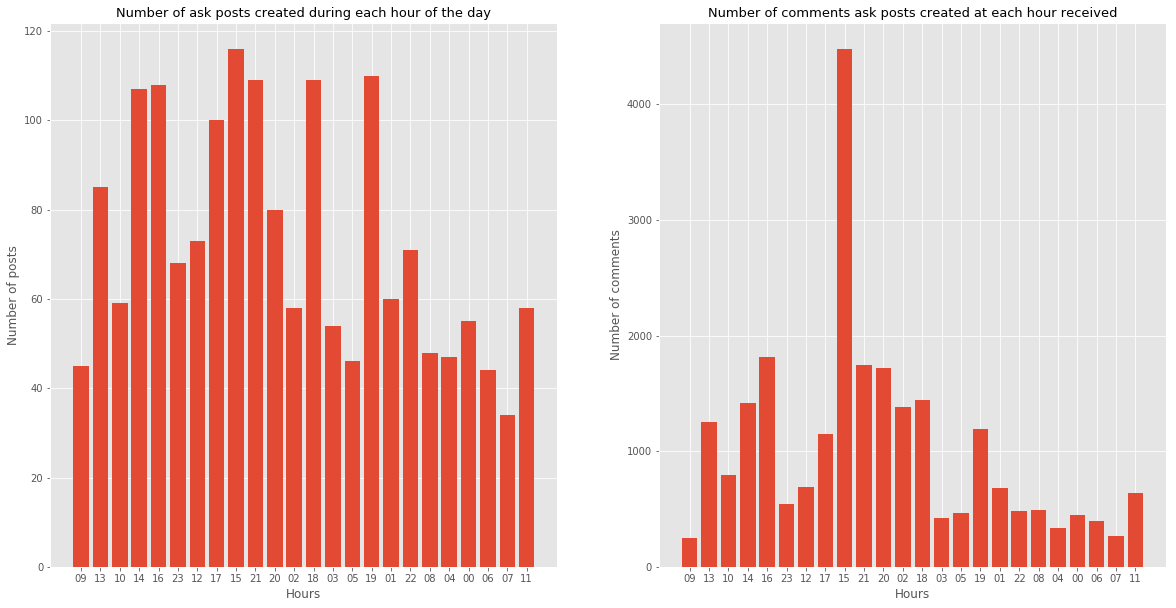

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

figure, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
figure.subplots_adjust(hspace=0.4, wspace=0.2)

ax1.set_title('Number of ask posts created during each hour of the day', fontsize=13)
ax1.set_xlabel('Hours', fontsize=12)
ax1.set_ylabel('Number of posts', fontsize=12)
ax1.bar(list(counts_by_hour.keys()),list(counts_by_hour.values()))

ax2.set_title('Number of comments ask posts created at each hour received', fontsize=13)
ax2.set_xlabel('Hours', fontsize=12)
ax2.set_ylabel('Number of comments', fontsize=12)
ax2.bar(list(comments_by_hour.keys()),list(comments_by_hour.values()))

**Sort the `comments_by_hour` dictionary in descending order of number of comments**

In [11]:
sorted_comments_by_hour = {}
list_of_tuples = [(n_cmnt, hour) for hour, n_cmnt in comments_by_hour.items()]
sorted_list_of_tuples = sorted(list_of_tuples, reverse=True)
for tup in sorted_list_of_tuples:
    sorted_comments_by_hour[tup[1]] = tup[0]
print(json.dumps(sorted_comments_by_hour, indent=2))

{
  "15": 4477,
  "16": 1814,
  "21": 1745,
  "20": 1722,
  "18": 1439,
  "14": 1416,
  "02": 1381,
  "13": 1253,
  "19": 1188,
  "17": 1146,
  "10": 793,
  "12": 687,
  "01": 683,
  "11": 641,
  "23": 543,
  "08": 492,
  "22": 479,
  "05": 464,
  "00": 447,
  "03": 421,
  "06": 397,
  "04": 337,
  "07": 267,
  "09": 251
}


From the above visualizations and `sorted_comments_by_hour` dictionary, we observe that
- Maximum number of ask posts are posted during 15:00 hrs (or 3 pm) of the day
- Also, the posts that were created at 15:00 hrs received maximum number of comments compared to the other hours of the day

**Calculating the Average Number of Comments for `Ask HN` Posts by Hour**

We'll calculate the average amount of comments `Ask HN` posts created at each hour of the day receive.

In [12]:
avg_cmnts_per_hour = []
for hour in comments_by_hour:
    avg_cmnts_per_hour.append([hour,(comments_by_hour[hour]/counts_by_hour[hour])])

avg_cmnts_per_hour

[['09', 5.5777777777777775],
 ['13', 14.741176470588234],
 ['10', 13.440677966101696],
 ['14', 13.233644859813085],
 ['16', 16.796296296296298],
 ['23', 7.985294117647059],
 ['12', 9.41095890410959],
 ['17', 11.46],
 ['15', 38.5948275862069],
 ['21', 16.009174311926607],
 ['20', 21.525],
 ['02', 23.810344827586206],
 ['18', 13.20183486238532],
 ['03', 7.796296296296297],
 ['05', 10.08695652173913],
 ['19', 10.8],
 ['01', 11.383333333333333],
 ['22', 6.746478873239437],
 ['08', 10.25],
 ['04', 7.170212765957447],
 ['00', 8.127272727272727],
 ['06', 9.022727272727273],
 ['07', 7.852941176470588],
 ['11', 11.051724137931034]]

**Sort the `avg_cmnts_per_hour` list in descending order of average number of comments**

In [13]:
sorted_avg_cph = sorted(avg_cmnts_per_hour, key=lambda avg_list: avg_list[1], reverse=True)
sorted_avg_cph

[['15', 38.5948275862069],
 ['02', 23.810344827586206],
 ['20', 21.525],
 ['16', 16.796296296296298],
 ['21', 16.009174311926607],
 ['13', 14.741176470588234],
 ['10', 13.440677966101696],
 ['14', 13.233644859813085],
 ['18', 13.20183486238532],
 ['17', 11.46],
 ['01', 11.383333333333333],
 ['11', 11.051724137931034],
 ['19', 10.8],
 ['08', 10.25],
 ['05', 10.08695652173913],
 ['12', 9.41095890410959],
 ['06', 9.022727272727273],
 ['00', 8.127272727272727],
 ['23', 7.985294117647059],
 ['07', 7.852941176470588],
 ['03', 7.796296296296297],
 ['04', 7.170212765957447],
 ['22', 6.746478873239437],
 ['09', 5.5777777777777775]]

In [14]:
print("Top 5 Hours for 'Ask HN' Comments")
for avg_cmnt_list in sorted_avg_cph[:5]:
    hour = avg_cmnt_list[0]
    avg_cmnt = avg_cmnt_list[1]
    print('{} - {:.2f} average comments per post'.format(dt.datetime.strptime(hour,'%H').strftime('%H:%M'),avg_cmnt))

Top 5 Hours for 'Ask HN' Comments
15:00 - 38.59 average comments per post
02:00 - 23.81 average comments per post
20:00 - 21.52 average comments per post
16:00 - 16.80 average comments per post
21:00 - 16.01 average comments per post


The hour that receives the most comments per post on average is 15:00 (3:00 pm), with an average of 38.59 comments per post.

According to the data set documentation, the timezone used is Eastern Time in the US. So, we could also write 15:00 as 3:00 pm est.

**Conclusion**

In this project, we analyzed ask posts and show posts to determine which type of post and time receive the most comments on average. Based on our analysis, to maximize the amount of comments a post receives, we'd recommend the post be categorized as ask post and created between `15:00` and `16:00` (3:00 pm est - 4:00 pm est).